# A gentle introduction to Reinforcement Learning


In 2016, AplhaGo, a program developed for playing Go, made headlines when it beat the world champion Go player in a five-game match. It was a remarkable feat because the number of possible legal moves in Go are of the order of 2.1 × 10<sup>170</sup>.  To put this in context, this number is far, far greater than the number of atoms in the observable universe, which are of the order of 10<sup>80</sup>. Such a high number of possibilities make it almost impossible to create a program that can play effectively using brute-force or somewhat optimized search algorithms. A part of the secret sauce of AlphaGO was the usage of Reinforcement Learning to improve its understanding of the game by playing against itself. Since then, the field of Reinforcement Learning has seen a lot of interest, and much more efficient programs have been developed to play various games at a pro-human efficiency. Although you would find Reinforcement Learning discussed in the context of Games and Puzzles in most places (including this post), the applications of Reinforcement Learning are much more expansive. The objective of this tutorial is to give you a gentle introduction to the world of Reinforcement Learning.  

## What is Reinforcement Learning

Reinforcement learning is a paradigm of Machine Learning where learning happens through the feedback gained by an agent's interaction with its environment. This is also one of the key differentiators of Reinforcement Learning with the other two paradigms of Machine learning (Supervised learning and Unsupervised learning). Supervised learning algorithms require fully labelled-training-data, and Unsupervised learning algorithms need no labels. On the other hand, reinforcement learning algorithms utilize feedback from the environment they're operating in to get better at the tasks they're being trained to perform. 

It is almost inevitable to talk about Reinforcement Learning with clarity without using some technical terms like "agent", "action", "state", "reward", and "environment". So let's try to gain a high-level understanding of Reinforcement Learning and these terms through an analogy,

### Understanding Reinforcement learning through Birbing

Let's watch the first few seconds of this video first,

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/u7TiRqh7x8s?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/Users/satwik/code/never_see_you_again/codementor/ongoing/alexey/venv/lib/python3.6/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Pretty cool, isn't it?

And now think about how did someone manage to teach this parrot to reply with certain sounds on certain prompts. And if you carefully observed, part of the answer lies in the food the parrot is given after every cool response. The human asks a question, and the parrot tries to respond in many different ways, and if the parrot's response is the desired one, it is rewarded with food.

Now guess what? The next time the parrot is exposed to the same cue, it is likely to answer similarly, expecting more food. This is how we "reinforce" certain behaviours through positive experiences. If I had to explain the above process in terms of Reinforcement learning concepts, it'd be something like,

"The agent learns to take desired for a given state in the environment", where,

- The "agent" is the parrot
- The "state" is questions or cues the parrot is exposed to
- The "actions" are the sounds it is uttering 
- The "reward" is the food he gets when he takes the desired action
- And the "environment" is the place where the parrot is living (or, in other words, everything else than the parrot)

The reinforcement can happen through negative experiences too. For example, if a child touches a burning candle out of curiosity, (s)he is unlikely to repeat the same action. So, in this case, instead of a reward, the agent got a penalty, which would disincentivize the agent to repeat the same action in future again.

If you try to think about it, there are countless similar real-world analogies. This suggests why Reinforcement Learning can be helpful for a wide variety of real-world applications and why it might be a path to create General AI Agents (think of a program that can not just beat a human in the game of Go, but multiple games like Chess, GTA, etc.). It might still take a lot of time to develop agents with general intelligence, but reading about programs like [MuZero](https://en.wikipedia.org/wiki/MuZero) (one of the many successors of Alpha Go) hints that Reinforcement learning might have a decent role to play in achieving that.

After reading the analogies, a few questions like below might have come into your mind,

- Real-world example is fine, but how do I do this "reinforcement" in the computer world?
- What are these algorithms, and how do they work?

Let's start answering such questions as switch gears and dive into certain technicalities of Reinforcement learning.

## Example problem statement: Self-driving taxi 

Wouldn't it be fantastic to train an agent (i.e. create a computer program) to pick up from a location and drop them at their desired location? In the rest of the tutorial, we'll solve a simplified version of this problem through reinforcement learning.

Before we do anything else, let's specify the typical steps in a Reinforcement learning process,

https://storage.googleapis.com/lds-media/documents/Reinforcement-Learning-Animation.gif

1. Agent observes the environment. The observation is represented in digital form and also called "state".
2. The agent utilizes the observation to decide how to act. The strategy agent uses to figure out the action to perform is also referred to as "policy".
3. The agent performs the action in the environment
4. The environment, as a result of the action, may move to a new state (i.e. generate different observations) and may return feedback to the agent in the form of rewards/penalties. 
5. The agent uses the rewards and penalties to refine its policy
6. The process can be repeated until the agent finds an optimal policy

Now that we're clear about the process, we need to set up the environment. In most cases, what this means is we need to figure out the following details,

### 1. The state-space

Typically, a "state" will encode the observable information that the agent can use to learn to act efficiently. For example, in the case of self-driving-taxi, the state information could contain the following information,

- The current location of the taxi
- The current location of the passenger
- The destination

There can be multiple ways to represent such information, and how one ends up doing it depends mostly on the level of sophistication intended. So the state space is the set of all possible states an environment can be in. 

For example, if we consider our environment for the self-driving taxi to be a two-dimensional 4x4 grid, there are 

- 16 possible locations for the taxi
- 16 possible locations for the passenger
- and 16 possible destination

This means our state-space size becomes 16 x 16 x 16 = 4096, i.e. at any point in time the environment must be in either of these 4096 states. 

### 2. The action space

Action space is the set of all possible actions an agent can take in the environment. Taking the same 2D grid-world example, the taxi agent may be allowed to take the following actions,

- Move North
- Move South
- Move East
- Move West
- Pickup
- Drop-off

Again, there can be multiple ways to define the action space, and this is just one of them. The choice also depends on the level of complexity and algorithms you'd want to use later.

### 3. The rewards 

The rewards and penalties are critical for an agent's learning. While deciding the reward structure, we must carefully think about the magnitude, direction (positive or negative), and the reward frequency (every time step / based on specific milestone / etc.). Taking the same grid environment example, some ideas for reward structure can be,

- The agent should receive a positive reward when it performs a successful passenger drop-off. The reward should be high in magnitude because this behaviour is highly desired.
- The agent should be penalized if it tries to drop off a passenger in the wrong locations.
- The agent should get a small negative reward for not making it to the destination after every time step. This would incentivize the agent to take faster routes.

There can be more ideas for rewards like giving a reward for successful pickup and so on. 

### 4. The transition rules

The transition rules are kind of the brain of the environment. They specify the dynamics of the above discussed components (state, action, and reward). They are often represented in terms of tables (a.k.a state transition tables) which specify that,

> For a given state S, if you take an action A, the new state of the environment becomes S', and the reward received is R. 


| State | Action | Reward | Probability | Next State |
|:-----:|:------:|:------:|:-----------:|:----------:|
|   Sp  |   Aq   |   Rpq  |     1.0     |     Sp'    |
|  ...  |   ...  |   ...  |     ...     |     ...    |

An example row could be when the taxi's location is in the middle of grid, the passenger's location in in the bottom-right corner. The agent takes the "Move North" action, it gets a negative reward, and the next state becomes the state that represents the taxi in its new position.

*Note:* In the real-world, the state transitions may not be deterministic, i.e. they can be either.

- Stochastic; which means the rules operate by probability, i.e. if you take an action, there's an X1% chance you'll end up in state S1, and Xn% chance you'd end up in a state Sn.
- Unknown; which means it is not known in advance what all possible states the agent can get into if it takes action A in a given state S. This might be the case when the agent is operating in the real world.


## Implementing the environment

Implementing a computer program that represents the environment can be a bit of a programming effort. Apart from deciding the specifics like the state space, transition table, reward structure, etc., we need to implement other features like creating a way to input actions into the environment and getting feedback in return. More often than not, there's also a requirement to visualize what's happening under the hood. Since the objective of this tutorial is "Introduction to Reinforcement Learning", we will skip the "how to program a Reinforcement learning environment" part and jump straight to using it. However, if you're interested, you can check the [source code](https://github.com/satwikkansal/gym-dual-taxi) and follow the comments there.

### Specifics of the environment

We'll use a custom environment inspired by OpenAI gym's [Taxi-v3 environment](https://gym.openai.com/envs/Taxi-v3/). We have added a twist to the environment. Instead of having a single taxi and a single passenger, we'll be having two taxis and a passenger! The intention behind the mod is to observe interesting dynamics that might arise because of the presence of another taxi. This also means the state space would comprise an additional taxi location, and the action space would comprise of actions of both the taxis now.

Our environment is built on OpenAI's gym library, making it a bit convenient to implement environments to evaluate Reinforcement learning algorithms. They also include some pre-packaged environment (Taxi-v3 is one of them), and their environments are a popular way to practice Reinforcement Learning and evaluate Reinforcement Learning algorithms. Feel free to check out their docs to know more about them! 

### Exploring the environment

It's time we start diving into some code and explore the specifics of the environment we'll be using for Reinforcement learning in this tutorial.

In [2]:
# Let's first install the custom gym module which contains the environment 
! pip install git+git://github.com/satwikkansal/gym-dual-taxi.git#"egg=gym&subdirectory=gym/"

You should consider upgrading via the '/Users/satwik/.pyenv/versions/3.6.9/bin/python3.6 -m pip install --upgrade pip' command.


In [3]:
import gym
env = gym.make('DualTaxi-v1')
env.render()

Total encoded states are 6144
+-------+
|R: | :G|
| : | : |
| | : : |
|Y: |B: |
+-------+



In the snippet above, we initialize our custom `DualTaxi-v1` environment, and rendered its current state. In the rendered output,

- The yellow and red rectangles represents both taxis on the 4x4 grid
- R, G, B, and Y are the 4 possible pick up or drop-off locations for the passenger
- The character “|” represents a wall which the taxis can't cross
- The blue colored letter represents the pick-up location of the passenger
- The purple letter represents the drop-off location.
- Any taxi that gets the passenger aboard, would turn green in color


In [4]:
env.observation_space, env.action_space

(Discrete(6144), Discrete(36))

You might have noticed that the only information that's printed is their discrete nature and the size of the space. The rest of the details are abstracted. This is an important point, and as you'll realize by the end of the post, our RL algorithm won't need any more information. 

However if you're still curious to know how the environment functions, feel free to check out the [enviroment's code](https://github.com/satwikkansal/gym-dual-taxi) and follow the comments there. Another thing that you can do is peek into the state-transition table (check the code in the appendix if you're curious how to do it)

### The objective

The objective of the environment is pick up the passenger from the blue location and drop to the violet location as fast as possible. An intelligent agent should be able to do this with consistency. Now let's see what information to we have for the environment's state space (a.k.a observation space) and action space. But before we dive into implementing that intelligent agent, let's see how a random agent would perform in this kind of enviromnet,

In [5]:
from IPython.display import clear_output
from time import sleep 

def play_random(env, num_episodes):
    frames=[]
    for i in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            next_action = env.action_space.sample()
            state, reward, done, _ = env.step(next_action)
            frames.append({
                'frame': env.render(mode='ansi'),
                'state': state,
                'reward': reward,
                'episode': i + 1
                }
            )
    return frames

def print_frames(frames, speed=10):
    for frame in frames:
        clear_output(wait=True)
        print(f"Episode #{frame['episode']}")
        print(frame['frame'])
        print(f"State: {frame['state']}")
        print(f"Reward: {frame['reward']}")
        sleep(1/speed)

In [6]:
frames = play_random(env, num_episodes=2)
print_frames(frames)

Episode #2
+-------+
|R: | :G|
| : | : |
| | : : |
|Y: |B: |
+-------+
  (Dropoff)
  (Dropoff)

State: 4834
Reward: 90


You can see the episode number at the top. In our case, an episode is the timeframe between the steps where the taxis make the first move and the step where they drop a passenger at the desired after picking up. When this happens, the episode is over, and we have to reset the environment to start all over again. 

You can see different actions at the bottom, and how the state keeps changing and the reward the agent gets after every action.

As you can might have realized, these taxis are taking a while to finish even a single episode. So our random approach is very dumb for sure. Our intelligent agent definitely will have to perform this task better.

## Introducing Q-learning

Q-learning is one among several Reinforcement Learning algorithms. The reason we are picking Q-learning is because it is simple and straightforward to understand. We'll use Q-learning to make our agent somewhat intelligent. 

### Intuition behind Q-learning

The way Q-learning works, is by storing what we call Q-values for every state-action combination. The Q-value represents the "quality" of an action taken from that state. Of course, the initial q-values are just random numbers, but the goal is to iteratively update them in the right direction. After enough iterations, these Q-values can start to converge (i.e. the size of update in upcoming iterations gets so small that it has a negligible impact). Once that is the case, we can safely say that, 

> For a given state, the higher the Q-value for the state-action pair, the higher would be the expected long term reward of taking that particular action. 

So long story short, the "developing intelligence" part of Q-learning lies in how the Q-values after agent's ineteraction with the environment, which requires discussion of two key concepts,

### 1. The bellman equation

Attached below is the bellman equation in the context of updating Q-values, this is the equation we use to update Q-values after agent's interaction with the environment.

[![q_learning_equation.png](https://s31.postimg.cc/jp7l94d57/q_learning_equation.png)](https://postimg.cc/image/4ghnvcjgn/)

The Q-value of a state-action pair is the sum of the instant reward and the discounted future reward (of the resulting state). Where,

- $s_t$ represents the state at time $t$
- $a_t$ represents action taken at time $t$ (the agent was in state $s_t$ at this point in time)
- $r_t$ is the reward received by performing the action $a_t$ in the state $s_t$.
- $s_{t+1}$ is the next state that our agent will transition to after performing the action $a_t$ in the state $s_t$.


The discount factor $\gamma$ (gamma) determines how much importance we want to give to future rewards. A high value for the discount factor (close to **1**) captures the long-term effective award, whereas, a discount factor of **0** makes our agent consider only immediate reward, hence making it greedy. 

The $\alpha$ (alpha) is our learning rate. Just like in supervised learning settings, $\alpha$ here is representative of the extent to which our Q-values are being updated in every iteration.


### 2. Epsilon greedy method

While we keep updating Q-values every iteration, there's an important choice the agent has to make while taking an action. The choice it faces is whether to "explore" or "exploit"?

So with time, the Q-values get better at representing the quality of a state-action pair. But to reach that goal, the agents has to try different actions (how can it know if a state-action pair is good if it hasn't tried it?). So it becomes critical for agent to "explore" i.e. take random actions to gather more knowledge about the environment. 

But there's a problem if the agent only explores. Exploration can only get the agent so far. Imagine that the environment agent is in is like a maze. Exploration can put agent on unknown path and give feedback to make q-values more valuable. But if the agent is only taking random actions at every step, it is going to have a hard time reaching the end state of the maze. That's why it is also important to "exploit". The agent should also consider using what it has already learned (i.e. the Q-values) to decided what action to take next.

That's all to say, the agent needs to balance exploitation and exploration. There are many ways to do this. Once common way to do it with Q-learning is to have a value called "epsilon", which denotes the probability by which the agent will explore. A higher epsilon value results in interactions with more penalties (on average) which is obvious because we are exploring and making random decisions. We can add more sophistication to this method, and its a common practice that people start with a high epsilon value, and keep reducing it as time progresses. This is called epsilon decay. The intution is that as we keep adding more knowledge to Q-values through exploration, the exploitation becomes more trustworthy which in turn means we can explore at a lower rate. 


Note: There's usually some confusion around if epsilon represents probability of "exploration" or "exploitation". You'll find it used both ways on the internet and other resources. I find the first way more comfortable as it fits the terminology "epsilon decay". That's all to say, if you see it other way around, don't get confused, the concept is still the same. 

## Using Q-learning for our environment

Okay, enough background about Q-learning. Now how do we apply it to our `DualTaxi-v1` environment. Because of the fact that we have two taxis in that environment, we can do it in a couple of ways,

### 1. Cooperative approach

In this approach we can assume that there's a single agent with a single Q-table that controls both the taxis (think of it like a taxi agency). The overall goal of this agent would be to maximize the reward these taxis receive combined.


### 2. Competitive approach

In this approach we can train two agents (one for each taxi). Every agent has its own Q-table and gets its own reward. Of course, the next state of the environment still depends on the actions of both the agents. This creates an interesting dynamic where each taxi would be trained to maximize its own individual rewards.

## Cooperative approach in action

We're soon about to see the code for Q-learning in action. Before we do that, let us specify the steps we'd have to take,

1. Initialize the Q-table (size of the Q-table is state_space_size x action_space_size) by all zeros.
2. Decide between exploration and exploitation based on the epsilon value.
3. Exploration: For each state, select any one among all possible actions for the current state (S).
4. Exploitation: For all possible actions from the state (S') select the one with the highest Q-value.
5. Travel to the next state (S') as a result of that action (a).
6. Update Q-table values using the update equation.
7. If the episode is over (i.e. goal state is reached), reset the environment for next iteration.
8. Keep repeating steps 2 to 7 until we start seeing decent results in agent's performance.

In [15]:
from collections import Counter, deque
import random 


def bellman_update(q_table, state, action, next_state, reward):
    old_q_value = q_table[state, action]
    # Maximum q_value for the actions in next state
    next_max = np.max(q_table[next_state])
    # Calculate the new q_value
    new_q_value = (1 - alpha) * old_q_value + alpha * (reward + gamma * next_max)
    # Finally, update the q_value
    q_table[state, action] = new_q_value


def update(q_table, env, state):
    if random.uniform(0, 1) > epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table[state])

    next_state, reward, done, info = env.step(action)
    bellman_update(q_table, state, action, next_state, reward)
    return next_state, reward, done, info


def train_agent(
        q_table, env, num_episodes, log_every=50000, running_metrics_len=50000,
        evaluate_every=1000, evaluate_trials=200):
    
    rewards = deque(maxlen=running_metrics_len)
    episode_lengths = deque(maxlen=50)
    total_timesteps = 0
    
    metrics = {}
    
    for i in range(num_episodes):
        epochs = 0
        state = env.reset()
        num_penalties, reward= 0, 0
        done = False
    
        while not done:
            state, reward, done, info = update(q_table, env, state)
            rewards.append(reward)
            epochs += 1
            total_timesteps += 1
            
            if total_timesteps % log_every == 0:
                rd = Counter(rewards)
                avg_ep_len = np.mean(episode_lengths)
                zeroes, fill_percent = calculate_q_table_metrics(q_table)
                print(f'Current Episode: {i}')
                print(f'Reward distribution: {rd}')
                print(f'Last 10 episode lengths (avg: {avg_ep_len})')
                print(f'{zeroes} Q table zeroes, {fill_percent} percent filled')
                

        episode_lengths.append(epochs)
        
        if i % evaluate_every == 0:
            print('===' * 10)
            print(f"Running evaluation after {i} episodes")
            finish_percent, avg_time, penalties = evaluate_agent(q_table, env, evaluate_trials)
            print('===' * 10)
            rd = Counter(rewards)
            avg_ep_len = float(np.mean(episode_lengths))
            zeroes, fill_percent = calculate_q_table_metrics(q_table)
            
            metrics[i] = {
                    'train_reward_distribution': rd,
                    'train_ep_len': avg_ep_len,
                    'fill_percent': fill_percent,
                    'test_finish_percent': finish_percent,
                    'test_ep_len': avg_time,
                    'test_penalties': penalties
            }
        
    print("Training finished.")
    return q_table, metrics

def calculate_q_table_metrics(grid):
    r, c = grid.shape
    total = r * c
    count = 0
    for row in grid:
        for cell in row:
            if cell == 0:
                count += 1
    fill_percent = (total - count) / total * 100.0
    return count, fill_percent

def evaluate_agent(q_table, env, num_trials):
    total_epochs, total_penalties, total_wins = 0, 0, 0
    for _ in range(num_trials):
        state = env.reset()
        epochs, num_penalties, wins = 0, 0, 0
        done = False
        while not done:
            next_action = np.argmax(q_table[state])
            state, reward, done, _ = env.step(next_action)
            if reward < -2:
                num_penalties += 1
            elif reward > 10:
                wins += 1
            epochs += 1
        total_epochs += epochs
        total_penalties += num_penalties
        total_wins += wins

    average_penalties, average_time, complete_percent = compute_evaluation_metrics(num_trials,total_epochs,total_penalties,total_wins)
    print_evaluation_metrics(average_penalties,average_time,num_trials,total_wins)
    return complete_percent, average_time, average_penalties

def print_evaluation_metrics(average_penalties, average_time, num_trials, total_wins):
    print("Evaluation results after {} trials".format(num_trials))
    print("Average time steps taken: {}".format(average_time))
    print("Average number of penalties incurred: {}".format(average_penalties))
    print(f"Had {total_wins} wins in {num_trials} episodes")

def compute_evaluation_metrics(num_trials, total_epochs, total_penalties, total_wins):
    average_time = total_epochs / float(num_trials)
    average_penalties = total_penalties / float(num_trials)
    complete_percent = total_wins / num_trials * 100.0
    return average_penalties, average_time, complete_percent

In [16]:
! pip install numpy matplotlib seaborn

You should consider upgrading via the '/Users/satwik/.pyenv/versions/3.6.9/bin/python3.6 -m pip install --upgrade pip' command.


In [17]:
import numpy as np

# The hyper-parameters of Q-learning
alpha = 0.1
gamma = 0.7
epsilon = 0.2
env = gym.make('DualTaxi-v1')
num_episodes = 10000

q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table, metrics = train_agent(q_table, env, num_episodes)

Total encoded states are 6144
Running evaluation after 0 episodes
Evaluation results after 200 trials
Average time steps taken: 1500.0
Average number of penalties incurred: 1500.0
Had 0 wins in 200 episodes
Current Episode: 74
Reward distribution: Counter({-4: 16622, -12: 15224, -3: 8820, -20: 4108, -11: 2613, -30: 1956, -2: 408, -10: 189, 99: 42, 90: 18})
Last 10 episode lengths (avg: 611.82)
181056 Q table zeroes, 18.14236111111111 percent filled
Current Episode: 166
Reward distribution: Counter({-4: 16783, -12: 16729, -3: 7374, -20: 4066, -11: 2547, -30: 1909, -2: 369, -10: 139, 99: 53, 90: 31})
Last 10 episode lengths (avg: 587.84)
149018 Q table zeroes, 32.627133969907405 percent filled
Current Episode: 260
Reward distribution: Counter({-12: 17188, -4: 16513, -3: 6753, -20: 4419, -11: 2436, -30: 1976, -2: 446, -10: 181, 99: 67, 90: 21})
Last 10 episode lengths (avg: 463.2)
122910 Q table zeroes, 44.43088107638889 percent filled
Current Episode: 362
Reward distribution: Counter({-1

Evaluation results after 200 trials
Average time steps taken: 910.94
Average number of penalties incurred: 906.385
Had 79 wins in 200 episodes
Current Episode: 7336
Reward distribution: Counter({-4: 16775, -12: 13989, -3: 9578, -20: 4066, -11: 2565, -30: 1571, -2: 804, 99: 362, 90: 160, -10: 130})
Last 10 episode lengths (avg: 82.4)
49670 Q table zeroes, 77.54358362268519 percent filled
Current Episode: 7869
Reward distribution: Counter({-4: 16025, -12: 13866, -3: 10338, -20: 4050, -11: 2766, -30: 1458, -2: 837, 99: 376, 90: 150, -10: 134})
Last 10 episode lengths (avg: 84.34)
49489 Q table zeroes, 77.62541594328704 percent filled
Running evaluation after 8000 episodes
Evaluation results after 200 trials
Average time steps taken: 821.155
Average number of penalties incurred: 820.245
Had 91 wins in 200 episodes
Current Episode: 8422
Reward distribution: Counter({-4: 15858, -12: 13642, -3: 10398, -20: 4043, -11: 2944, -30: 1589, -2: 873, 99: 381, 90: 167, -10: 105})
Last 10 episode lengt

### Competitive Approach

The steps for this are similar to the cooperative approach, with the differnce that now we have multiple Q-tables to update.

1. Initialize the Q-table 1 and 2 for both the agents by all zeros. The size of each Q-table is state_space_size x sqrt(action_space_size).
2. Decide between exploration and exploitation based on the epsilon value.
3. Exploration: For each state, select any one among all possible actions for the current state (S).
4. Exploitation: For all possible actions from the state (S') select the one with the highest Q-value in the Q-tables of respective agents.
5. Transition to the next state (S') as a result of that combined action (a1, a2).
6. Update Q-table values for both the agents using the update equation and respective rewards & actions.
7. If the episode is over (i.e. goal state is reached), reset the environment for next iteration.
8. Keep repeating steps 2 to 7 until we start seeing decent results in the performance.

In [18]:
def update_multi_agent(q_table1, q_table2, env, state):
    if random.uniform(0, 1) > epsilon:
        action = env.action_space.sample()
        action1, action2 = env.decode_action(action)
    else:
        action1 = np.argmax(q_table1[state])
        action2 = np.argmax(q_table2[state])
        action = env.encode_action(action1, action2)

    next_state, reward, done, info = env.step(action)
    reward1, reward2 = reward
    bellman_update(q_table1, state, action1, next_state, reward1)
    bellman_update(q_table2, state, action1, next_state, reward2)
    return next_state, reward, done, info


def train_multi_agent(
        q_table1, q_table2, env, num_episodes, log_every=50000, running_metrics_len=50000,
        evaluate_every=1000, evaluate_trials=200):

    rewards = deque(maxlen=running_metrics_len)
    episode_lengths = deque(maxlen=50)
    total_timesteps = 0

    metrics = {}

    for i in range(num_episodes):
        epochs = 0
        state = env.reset()
        done = False

        while not done:
            state, reward, done, info = update_multi_agent(q_table1, q_table2, env, state)
            rewards.append(sum(reward))
            epochs += 1
            total_timesteps += 1

            if total_timesteps % log_every == 0:
                rd = Counter(rewards)
                avg_ep_len = np.mean(episode_lengths)
                zeroes1, fill_percent1 = calculate_q_table_metrics(q_table1)
                zeroes2, fill_percent2 = calculate_q_table_metrics(q_table2)
                print(f'Current Episode: {i}')
                print(f'Reward distribution: {rd}')
                print(f'Last 10 episode lengths (avg: {avg_ep_len})')
                print(f'{zeroes1} Q table 1 zeroes, {fill_percent1} percent filled')
                print(f'{zeroes2} Q table 2 zeroes, {fill_percent2} percent filled')


        episode_lengths.append(epochs)

        if i % evaluate_every == 0:
            print('===' * 10)
            print(f"Running evaluation after {i} episodes")
            finish_percent, avg_time, penalties = evaluate_multi_agent(q_table1, q_table2, env, evaluate_trials)
            print('===' * 10)
            rd = Counter(rewards)
            avg_ep_len = float(np.mean(episode_lengths))
            zeroes1, fill_percent1 = calculate_q_table_metrics(q_table1)
            zeroes2, fill_percent2 = calculate_q_table_metrics(q_table2)

            metrics[i] = {
                    'train_reward_distribution': rd,
                    'train_ep_len': avg_ep_len,
                    'fill_percent1': fill_percent1,
                    'fill_percent2': fill_percent2,
                    'test_finish_percent': finish_percent,
                    'test_ep_len': avg_time,
                    'test_penalties': penalties
            }

    print("Training finished.\n")
    return q_table1, q_table2, metrics


def evaluate_multi_agent(q_table1, q_table2, env, num_trials):
    total_epochs, total_penalties, total_wins = 0, 0, 0

    for _ in range(num_trials):
        state = env.reset()
        epochs, num_penalties, wins = 0, 0, 0
        done = False
        while not done:
            next_action = env.encode_action(
                np.argmax(q_table1[state]),
                np.argmax(q_table2[state]))

            state, reward, done, _ = env.step(next_action)

            reward = sum(reward)

            if reward < -2:
                num_penalties += 1
            elif reward > 10:
                wins += 1

            epochs += 1
        total_epochs += epochs
        total_penalties += num_penalties
        total_wins += wins

    average_penalties, average_time, complete_percent = compute_evaluation_metrics(num_trials,total_epochs,total_penalties,total_wins)
    print_evaluation_metrics(average_penalties,average_time,num_trials,total_wins)
    return complete_percent, average_time, average_penalties

In [44]:
# The hyperparameter of Q-learning
alpha = 0.1
gamma = 0.8
epsilon = 0.2

env_c = gym.make('DualTaxi-v1', competitive=True)

num_episodes = 30000
q_table1 = np.zeros([env_c.observation_space.n, int(np.sqrt(env_c.action_space.n))])
q_table2 = np.zeros([env_c.observation_space.n, int(np.sqrt(env_c.action_space.n))])
q_table1, q_table2, metrics_c = train_multi_agent(q_table1, q_table2, env_c, num_episodes)

Total encoded states are 6144
Running evaluation after 0 episodes
Evaluation results after 200 trials
Average time steps taken: 1500.0
Average number of penalties incurred: 1500.0
Had 0 wins in 200 episodes
Current Episode: 79
Reward distribution: Counter({-4: 16301, -12: 14448, -3: 8732, -20: 5060, -11: 2608, -30: 2150, -2: 400, -10: 233, 99: 42, 90: 26})
Last 10 episode lengths (avg: 584.16)
14920 Q table 1 zeroes, 59.52690972222222 percent filled
14899 Q table 2 zeroes, 59.58387586805556 percent filled
Current Episode: 191
Reward distribution: Counter({-12: 15860, -4: 13903, -3: 9681, -20: 4655, -11: 3197, -30: 1678, -2: 637, -10: 279, 99: 77, 90: 33})
Last 10 episode lengths (avg: 444.04)
9954 Q table 1 zeroes, 72.998046875 percent filled
9945 Q table 2 zeroes, 73.0224609375 percent filled
Current Episode: 308
Reward distribution: Counter({-12: 16667, -4: 14116, -3: 9111, -20: 4330, -11: 3167, -30: 1490, -2: 701, -10: 307, 99: 86, 90: 25})
Last 10 episode lengths (avg: 374.82)
8595

Running evaluation after 7000 episodes
Evaluation results after 200 trials
Average time steps taken: 710.31
Average number of penalties incurred: 703.085
Had 106 wins in 200 episodes
Current Episode: 7070
Reward distribution: Counter({-12: 16264, -3: 11826, -4: 10249, -11: 4601, -20: 3890, -30: 1508, -2: 844, -10: 354, 90: 279, 99: 185})
Last 10 episode lengths (avg: 117.64)
8064 Q table 1 zeroes, 78.125 percent filled
8064 Q table 2 zeroes, 78.125 percent filled
Current Episode: 7614
Reward distribution: Counter({-12: 16062, -3: 11858, -4: 10464, -11: 4327, -20: 4003, -30: 1516, -2: 865, -10: 364, 90: 331, 99: 210})
Last 10 episode lengths (avg: 84.78)
8064 Q table 1 zeroes, 78.125 percent filled
8064 Q table 2 zeroes, 78.125 percent filled
Running evaluation after 8000 episodes
Evaluation results after 200 trials
Average time steps taken: 568.485
Average number of penalties incurred: 565.475
Had 117 wins in 200 episodes
Current Episode: 8172
Reward distribution: Counter({-12: 16086, 

Running evaluation after 18000 episodes
Evaluation results after 200 trials
Average time steps taken: 412.405
Average number of penalties incurred: 407.43
Had 146 wins in 200 episodes
Current Episode: 18439
Reward distribution: Counter({-12: 14496, -3: 13135, -4: 10357, -11: 4339, -20: 4025, -30: 1768, -2: 832, -10: 470, 90: 404, 99: 174})
Last 10 episode lengths (avg: 86.38)
8064 Q table 1 zeroes, 78.125 percent filled
8064 Q table 2 zeroes, 78.125 percent filled
Running evaluation after 19000 episodes
Evaluation results after 200 trials
Average time steps taken: 352.93
Average number of penalties incurred: 347.9
Had 154 wins in 200 episodes
Current Episode: 19055
Reward distribution: Counter({-12: 14337, -3: 13231, -4: 10338, -11: 4426, -20: 4004, -30: 1772, -2: 824, -10: 465, 90: 427, 99: 176})
Last 10 episode lengths (avg: 89.34)
8064 Q table 1 zeroes, 78.125 percent filled
8064 Q table 2 zeroes, 78.125 percent filled
Current Episode: 19669
Reward distribution: Counter({-12: 14037,

Training finished.



## Evaluating the performance

If you observed the code carefully, the train functions returned q-tables as well as some metrics. We can use the q-table now for taking agent's actions, and see how intelligent it has become. Also, we'll try to plot these metrics to visualize how the training progressed. 

In [34]:
from collections import defaultdict
import matplotlib.pyplot as plt
# import seaborn as plt

def plot_metrics(m):
    ep_nums = list(m.keys())
    series = defaultdict(list)
    for ep_num, metrics in m.items():
        for metric_name, metric_val in metrics.items():
            t = type(metric_val)
            if t in [float, int, np.float64]:
                series[metric_name].append(metric_val)

    for m_name, values in series.items():
        plt.plot(ep_nums, values)
        plt.title(m_name)
        plt.xlabel('Number of episodes')
        plt.show()

def play(q_table, env, num_episodes):
    frames=[]
    for i in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            next_action = np.argmax(q_table[state])
            state, reward, done, _ = env.step(next_action)
            frames.append({
                'frame': env.render(mode='ansi'),
                'state': state,
                'reward': reward,
                'episode': i + 1
                }
            )
    return frames


def play_multi(q_table1, q_table2, env, num_episodes):
    frames=[]
    for i in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            next_action = env.encode_action(
                np.argmax(q_table1[state]),
                np.argmax(q_table2[state]))
            state, reward, done, _ = env.step(next_action)
            frames.append({
                'frame': env.render(mode='ansi'),
                'state': state,
                'reward': reward,
                'episode': i + 1
                }
            )
    return frames

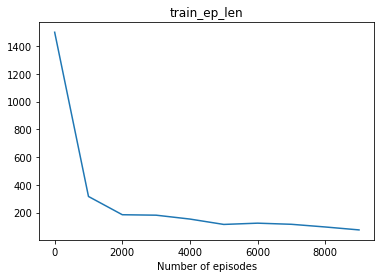

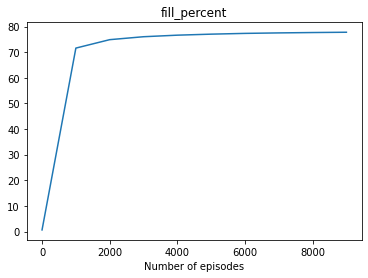

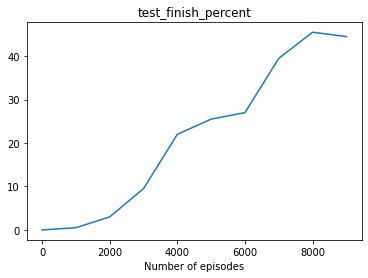

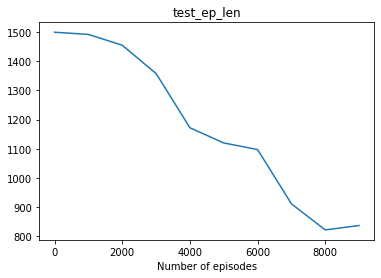

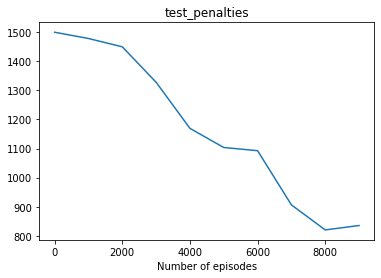

In [35]:
plot_metrics(metrics)

In [36]:
frames = play(q_table, env, 10)
print_frames(frames)

Episode #10
+-------+
|R: | :G|
| : | : |
| | : : |
|Y: |B: |
+-------+
  (East)
  (Dropoff)

State: 5760
Reward: 99


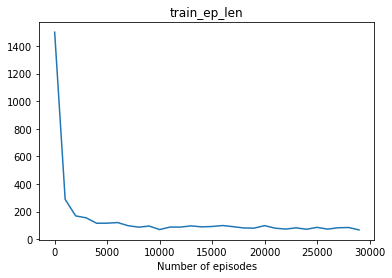

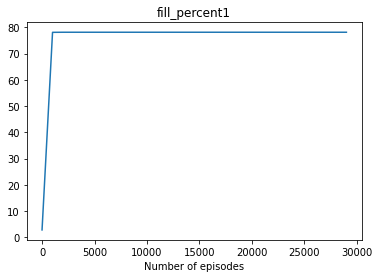

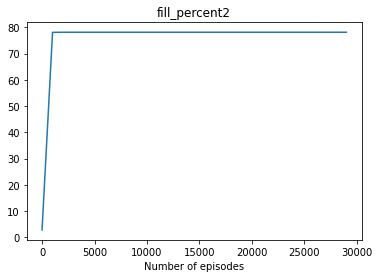

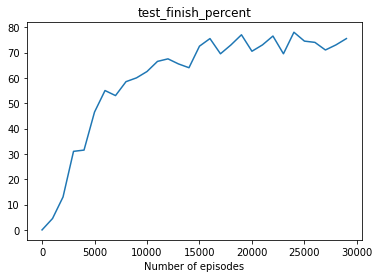

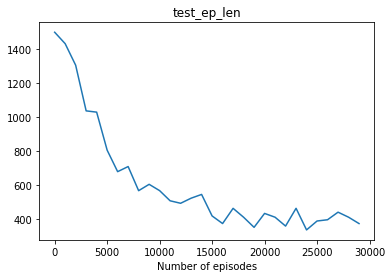

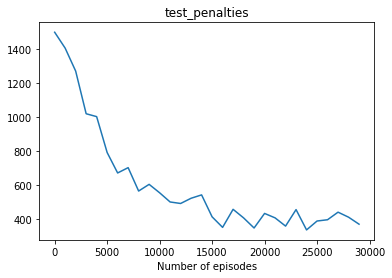

In [45]:
plot_metrics(metrics_c)

In [46]:
frames = play_multi(q_table1, q_table2, env_c, 10)
print_frames(frames)

Episode #10
+-------+
|R: | :G|
| : | : |
| | : : |
|Y: |B: |
+-------+
  (Dropoff)
  (Dropoff)

State: 5703
Reward: (100, -10)


### Some observations

- While Q-learning agent commits errors initially during exploration but once it has explored enough (seen most of the states), it starts to act wisely. 
- Both the approaches did fairly well. However, in relative comparison, the cooperative approach seem to perform better. The plots of competitive approach are more volatile. 
- It took around 2000 episodes for agents to explore most of the possible state-action pairs. Note that not state-action pairs are feasible because some states aren't legal (for example, states where both the taxis are at same location aren't possible).
- As the training progressed the number of penalties reduced. They didn't reduce completely because of the epsilon (we're still exploring based on the epsilon value during training). 
- The episode length kept decreasing, which means the taxis were able to pickup and drop the passenger faster because of the new learned knowledge in q-tables.

From what we've discussed so far in the post, it's likely that you have a fair bit of intution about how Reinforcement Learning works. Now in the last few sections we will dip our toes in some broader level ideas and concepts that might be relevant to you when exploring Reinforcement Learning further. Let's start with the common challenges of Reinforcement Learning first,


## Common challenges while applying Reinforcement learning


### Finiding the right Hyperparameters

You might be wondering how did I decide values of alpha, gamma, and epsilon. In the above program, it was mostly based on intuition from my past experience and some "hit and trial". This goes a long way, but there are also some techniques to come up with good values. The process in itself is sometimes referred to as Hyperparamter tuning or Hyperparameter optimization.

#### Tuning the hyperparameters

A simple way to programmatically come up with the best set of values of the hyperparameter is to create a comprehensive search function that selects the parameters that would result in best agent performance. A more sophisticated way to get the right combination of hyperparameter values would be to use Genetic Algorithms. Also, it is a common practice to make these parameters dynamic instead of fixed values. For example, in our case, all of the three hyperparmeters can be configured to decrease over time because as the agent continues to learn, it builds up more resilient priors.

### Choosing the right algorithms

Q-learning is just one of the many Reinformcement Learning algorithms out there. The selection depends on various factors including the nature of the environment. For example, if the state space of action space is continuous instead of discrete (imagine that the environment now expects continuous degree values instead of discrete north / east / etc directions as actions, and the state space consists of more precise lat/lng location of taxis instead of grid coordinates), tabular Q-learning can't work. There are hacks to get around continuous spaces (like bucketing their range and making it discrete as a result), but these hacks fail too if the state space and action space gets too large. In those cases, it is preferred to use more generic algorithms, usually the ones that involve approximators like Neural Networks. There are multiple ways to classify Reinforcement Learning algorithms. 

More often than not, in practice, the agent is trained with multiple algorithms initially to decide which algorithm would fit the best.


### Reward Structure

It is important to think strategically about the rewards to be given to the agent. If the rewards are too sparse, the agent might have difficulty in learning. Poorly structured rewards can also lead to cases of non-convergence and situations in which agent gets stuck in local minima. For example, let's say the environment gave +1 reward for successfully picking up passenger, and no penalty for dropping the passenger. So it might happen, that the agent might end up repeatedly picking up and dropping a passenger to maximise it rewards. Similary, if we there was very high negative reward for picking up passenger, agent would eventually learn to not pick a passenger at all, and hence would never finish successfully.

    
### The challenges of real world environments

Training an agent on an openAI gym environment is realtively easy because you get a lot of things out of the box. The real world, however, is a bit more unorganised. We sensors to ingest environment information and mechanism to translate it into something that can be fed to a Machine Learning algorithm. So such systems involve a lots of techniques overall aside from the learning algorithm. As a simple example, consider a general Reinforcement Learning agent that is being trained to play ATARI games. The information this agent needs to be passed is pixels on the screen. So we might have to use deep learning techniques (like Convolutional Neural Networks) to interpret the pixels on the screen and extract information out of the game (like scores), before letting the agent control the game.

There's also a challenge of sample efficiency. Since the state spaces and action spaces might be continuous and have big ranges, it becomes critical to achieve a decent sample efficiency that makes Reinforcement Learning feasible. If the algorithm needs high number of episodes (high enough that we cannot make it to produce results in reasonable amount of time), then Reinforcement Learning becomes impractical. 

### Respecting the theoretical boundaries

It is easy to sometimes get carried away and see Reinforcement Learning to be the solution of most problems. It helps to have a theoretical understanding of how these algorithm works and fundamental concepts like Markov Decision Processes (see the final section for recommended resources) when you attempt to frame a problem into a Reinforcement Learning task.


## Wrapping up 

In this tutorial, we began with understanding Reinforcement Learning with the help of real-world analogies. Then  we learned about some fundamental conepts like state, action, and rewards. Next, we went over the process of framing a problem such that we can traing an agent through Reinforcement Learning algorithms to solve it.

We took Self-driving taxi as our reference problem for the rest of the tutorial. We then used OpenAL's gym module in python to provide us with a related environment, where we can develop our agent and evaluate it. Then we observed how terrible our agent was without using any algorithm to play the game, so we went ahead to implement the Q-learning algorithm from scratch. 

We then introduced Q-learning, and went over the steps to use it for our environment. We came up with two approaches (cooperative and competitive). We then evaluated the Q-learning results, and saw how the agent's performance improved significantly after Q-learning.

We have discussed a lot about Reinforcement Learning and games in this post. But as mentioned in the beginning, Reinforcement learning is not just limited to games. It is used for managing portfolio and finances, for making humanoid robots, for manufacturing and inventory management, to develop general AI agents (agents that can perform multiple things with a single algorithm, like same agent playing multiple Atari games). Open AI also has a platform called universe for measuring and training an AI's general intelligence across myriads of games, websites and other general applications.

## Appendix

### Further reading

- Richard Sutton
- YouTube lectures by David Silver
- Friend and foe Q-learning (Nash Equilibrium)
- https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0
- Shapely value
- Game theory (strictly dominant strategy, nash equilibrium)

### Visualising the transition table of our dual taxi enviroment

In [15]:
env.P

{0: {0: [(1.0, 0, -30, False)],
  1: [(1.0, 1536, -0.5, True)],
  2: [(1.0, 1560, -0.5, True)],
  3: [(1.0, 1536, -0.5, True)],
  4: [(1.0, 1536, -0.5, True)],
  5: [(1.0, 1536, -0.5, True)],
  6: [(1.0, 96, -0.5, True)],
  7: [(1.0, 0, -30, False)],
  8: [(1.0, 24, -0.5, True)],
  9: [(1.0, 0, -30, False)],
  10: [(1.0, 0, -30, False)],
  11: [(1.0, 0, -30, False)],
  12: [(1.0, 480, -0.5, True)],
  13: [(1.0, 384, -0.5, True)],
  14: [(1.0, 0, -30, False)],
  15: [(1.0, 384, -0.5, True)],
  16: [(1.0, 384, -0.5, True)],
  17: [(1.0, 384, -0.5, True)],
  18: [(1.0, 96, -0.5, True)],
  19: [(1.0, 0, -30, False)],
  20: [(1.0, 24, -0.5, True)],
  21: [(1.0, 0, -30, False)],
  22: [(1.0, 0, -30, False)],
  23: [(1.0, 0, -30, False)],
  24: [(1.0, 96, -0.5, True)],
  25: [(1.0, 0, -30, False)],
  26: [(1.0, 24, -0.5, True)],
  27: [(1.0, 0, -30, False)],
  28: [(1.0, 0, -30, False)],
  29: [(1.0, 0, -30, False)],
  30: [(1.0, 96, -0.5, True)],
  31: [(1.0, 0, -30, False)],
  32: [(1.0, 24

In [22]:
! pip install pandas

You should consider upgrading via the '/Users/satwik/.pyenv/versions/3.6.9/bin/python3.6 -m pip install --upgrade pip' command.


In [31]:
import pandas as pd
table = []
for state_num, transition_info in env.P.items():
    for action, possible_transitions in transition_info.items():
        transition_prob, next_state, reward, done = possible_transitions[0]
        table.append({
            'State': list(env.decode(state_num)),
            'Action': env.decode_action(action),
            'Probablity': transition_prob,
            'Next State': next_state,
            'Reward': reward,
            'Is over': done,
        })
pd.DataFrame(table)

,State,Action,Probablity,Next State,Reward,Is over
0,"[(0, 0), (0, 0), 0, 0]","(0, 0)",1.0,0,-30.0,False
1,"[(0, 0), (0, 0), 0, 0]","(0, 1)",1.0,1536,-0.5,True
2,"[(0, 0), (0, 0), 0, 0]","(0, 2)",1.0,1560,-0.5,True
3,"[(0, 0), (0, 0), 0, 0]","(0, 3)",1.0,1536,-0.5,True
4,"[(0, 0), (0, 0), 0, 0]","(0, 4)",1.0,1536,-0.5,True
...,...,...,...,...,...,...
221179,"[(3, 3), (3, 3), 5, 3]","(5, 1)",1.0,6047,-0.5,True
221180,"[(3, 3), (3, 3), 5, 3]","(5, 2)",1.0,6143,-30.0,False
221181,"[(3, 3), (3, 3), 5, 3]","(5, 3)",1.0,6119,-0.5,True
221182,"[(3, 3), (3, 3), 5, 3]","(5, 4)",1.0,6143,-30.0,False
